In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
#Sử dụng pandas để đọc dữ liệu
df=pd.read_csv('Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
unique_values1 = df['doornumber'].unique()
unique_values1 

array(['two', 'four'], dtype=object)

In [6]:
unique_values2 = df['cylindernumber'].unique()
unique_values2 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [7]:
door_map = {'two': 2, 'four': 4}
df['doornumber'] = df['doornumber'].map(door_map)
cylinder_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}  
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)
df['doornumber'] = df['doornumber'].astype('int64')
df['cylindernumber'] = df['cylindernumber'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 1.0, 'Distribution of Car Price')

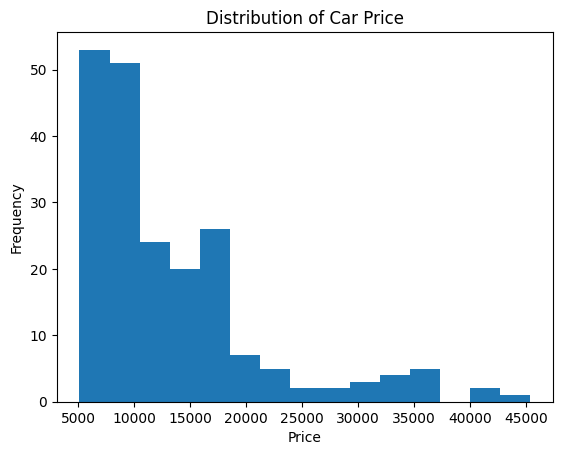

In [8]:
plt.hist(df['price'], bins=15)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Price')

<Axes: xlabel='carbody', ylabel='price'>

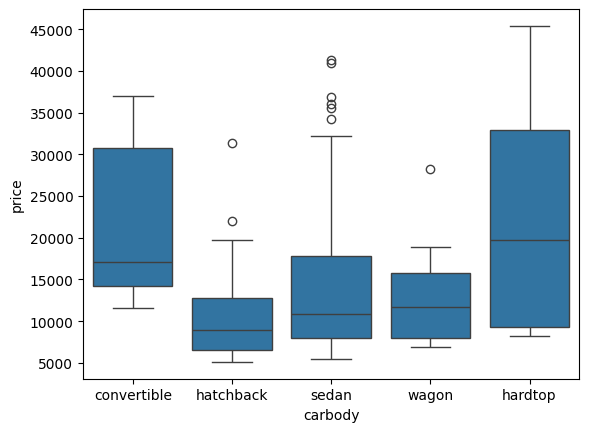

In [9]:
sns.boxplot(x='carbody', y='price', data=df)

<Axes: xlabel='horsepower', ylabel='price'>

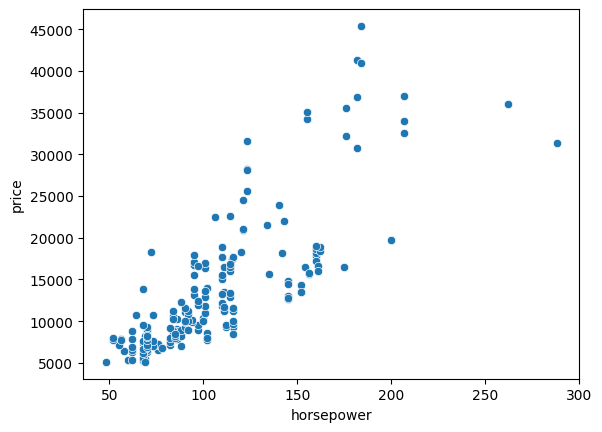

In [10]:
sns.scatterplot(x='horsepower', y='price', data=df)

In [11]:
pearsonr(df['price'], df['horsepower'])

PearsonRResult(statistic=0.8081388225362216, pvalue=1.4834365732940867e-48)

<Axes: xlabel='wheelbase', ylabel='price'>

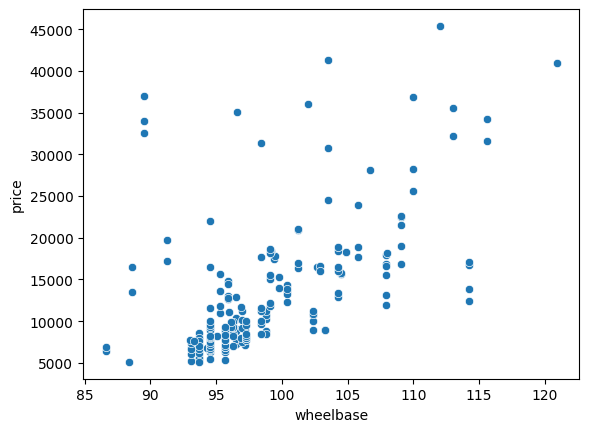

In [12]:
sns.scatterplot(x='wheelbase', y='price', data=df)

In [13]:
pearsonr(df['price'], df['wheelbase'])

PearsonRResult(statistic=0.5778155982921502, pvalue=1.1828204863376843e-19)

<Axes: xlabel='carlength', ylabel='price'>

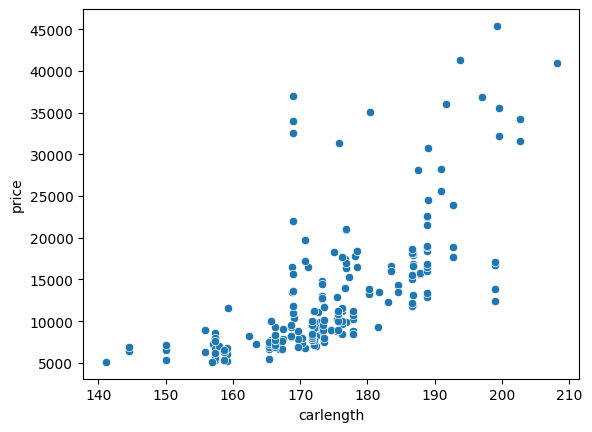

In [14]:
sns.scatterplot(x='carlength', y='price', data=df)

In [15]:
pearsonr(df['price'], df['carlength'])

PearsonRResult(statistic=0.682920015677962, pvalue=1.6787066240746824e-29)

<Axes: xlabel='carwidth', ylabel='price'>

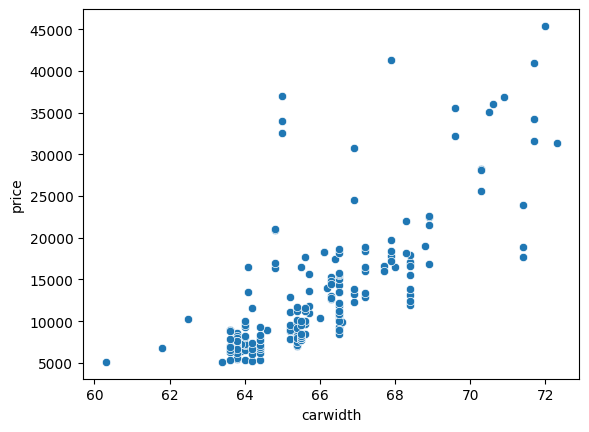

In [16]:
sns.scatterplot(x='carwidth', y='price', data=df)

In [17]:
pearsonr(df['price'], df['carwidth'])

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876119045e-40)

Text(0.5, 1.0, 'Heatmap')

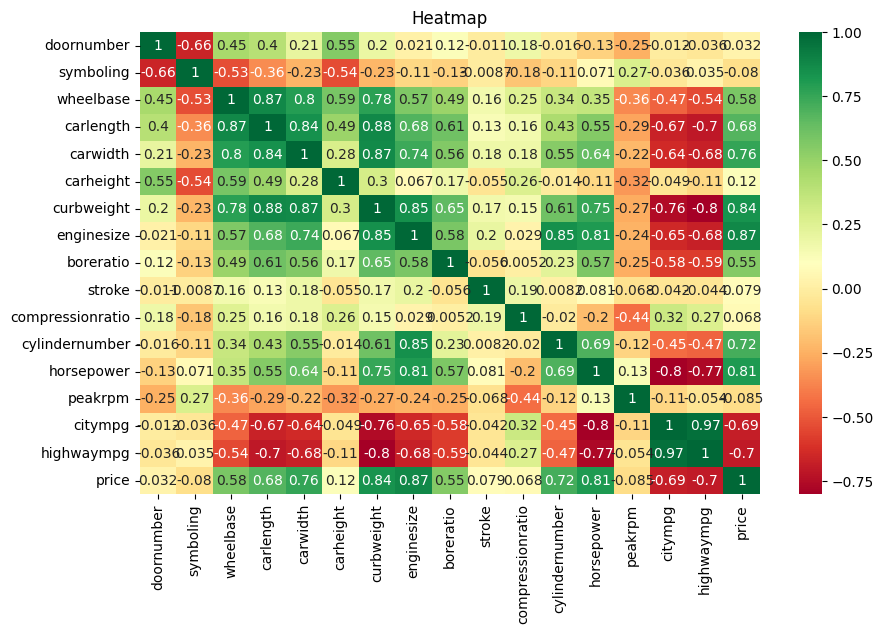

In [18]:
numeric_columns = ['doornumber','symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','cylindernumber','horsepower','peakrpm','citympg','highwaympg','price']
corr = df[numeric_columns].corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap='RdYlGn')
plt.title('Heatmap')

In [19]:
# giữ lai cac bien wheelbase,carlength, carwidth,curbweight,enginesize,cylindernumber, boreratio,horsepower,citympg,highwaympg 

In [20]:
dummy=pd.get_dummies(df[['fueltype','aspiration', 'carbody','drivewheel','enginelocation','enginetype','fuelsystem']]).astype(int)
dummy.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df = pd.concat([df, dummy], axis=1)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df = df.drop(['doornumber', 'symboling', 'CarName', 'fueltype', 'aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','carheight','stroke','peakrpm'], axis=1)
df.head()

,car_ID,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,compressionratio,horsepower,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,2548,4,130,3.47,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,2548,4,130,3.47,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,171.2,65.5,2823,6,152,2.68,9.0,154,...,1,0,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,2337,4,109,3.19,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,176.6,66.4,2824,5,136,3.19,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [24]:
# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là gia xe, các biến đầu vào là các trường còn lại.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.coef_

array([-1.97689699e+01,  2.07071284e+02,  6.06676326e+01,  3.19035903e+02,
        3.88281065e+00,  8.33967376e+02,  6.33586961e+01, -3.48878447e+03,
       -8.14972344e+02,  3.01114378e+01,  2.10322929e+02,  3.76168845e+01,
        3.41710168e+03, -3.41710168e+03, -4.43058476e+02,  4.43058476e+02,
        3.91081335e+03,  1.26726553e+02, -1.21075845e+03, -7.15942207e+02,
       -2.11083924e+03, -3.22644962e+02, -9.55093046e+02,  1.27773801e+03,
       -6.38571682e+03,  6.38571682e+03, -2.30248166e+03,  9.09494702e-13,
       -4.33051986e+03,  1.08089985e+02,  1.58097636e+03, -2.88124744e+03,
        7.82518263e+03, -5.65293616e+02,  1.70981257e+02, -1.20649204e+03,
        3.41710168e+03,  0.00000000e+00,  1.17994019e+03, -1.44031957e+03,
       -1.55591789e+03])

In [26]:
lr.intercept_

-38422.90227220494

In [27]:
# Đánh giá mô hình.
from sklearn import metrics
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1881.3875672087004
Mean Squared Error: 6694807.497430773
Root Mean Squared Error: 2587.432607321546


In [28]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [29]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.8223650748168034

In [30]:
df.columns

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'compressionratio',
       'horsepower', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [31]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ wheelbase+ carlength+carwidth+curbweight+enginesize+cylindernumber+ boreratio+horsepower+citympg+highwaympg+fueltype_diesel+ fueltype_gas+aspiration_std+ aspiration_turbo+carbody_convertible+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+drivewheel_4wd+drivewheel_fwd+drivewheel_rwd+enginelocation_front+ enginelocation_rear+enginetype_dohc+ enginetype_dohcv+ enginetype_l+ enginetype_ohc+enginetype_ohcf+ enginetype_ohcv+ enginetype_rotor+fuelsystem_1bbl+ fuelsystem_2bbl+ fuelsystem_4bbl+fuelsystem_idi+ fuelsystem_mfi+ fuelsystem_mpfi+fuelsystem_spdi+ fuelsystem_spfi', data=df)

In [32]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     52.23
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           4.35e-72
Time:                        15:23:58   Log-Likelihood:                -1892.8
No. Observations:                 205   AIC:                             3850.
Df Residuals:                     173   BIC:                             3956.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.386e+04 

In [33]:
#mo hinh 2 tốt hơn